In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('../data/Food Delivery Time Prediction Case Study.xlsx')
print(df.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0     

In [3]:
df.describe(include='all')

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
count,45593.0,45593,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593,45593,45593.000000
unique,45355.0,1320,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
top,9000.0,PUNERES01DEL01,NaN,NaN,NaN,NaN,NaN,NaN,Snack,motorcycle,NaN
freq,4.0,67,NaN,NaN,NaN,NaN,NaN,NaN,11533,26435,NaN
mean,NaN,NaN,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,NaN,NaN,26.294607
std,NaN,NaN,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,NaN,NaN,9.383806
min,NaN,NaN,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,NaN,NaN,10.000000
25%,NaN,NaN,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,NaN,NaN,19.000000
50%,NaN,NaN,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,NaN,NaN,26.000000
75%,NaN,NaN,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,NaN,NaN,32.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [5]:
df[['Type_of_order','Type_of_vehicle']]

,Type_of_order,Type_of_vehicle
0,Snack,motorcycle
1,Snack,scooter
2,Drinks,motorcycle
3,Buffet,motorcycle
4,Snack,scooter
...,...,...
45588,Meal,motorcycle
45589,Buffet,motorcycle
45590,Drinks,scooter
45591,Snack,motorcycle


In [6]:
df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [7]:
df['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [8]:
df[['Delivery_person_ID','ID']]

,Delivery_person_ID,ID
0,INDORES13DEL02,4607
1,BANGRES18DEL02,B379
2,BANGRES19DEL01,5D6D
3,COIMBRES13DEL02,7A6A
4,CHENRES12DEL01,70A2
...,...,...
45588,JAPRES04DEL01,7C09
45589,AGRRES16DEL01,D641
45590,CHENRES08DEL03,4F8D
45591,COIMBRES11DEL01,5EEE


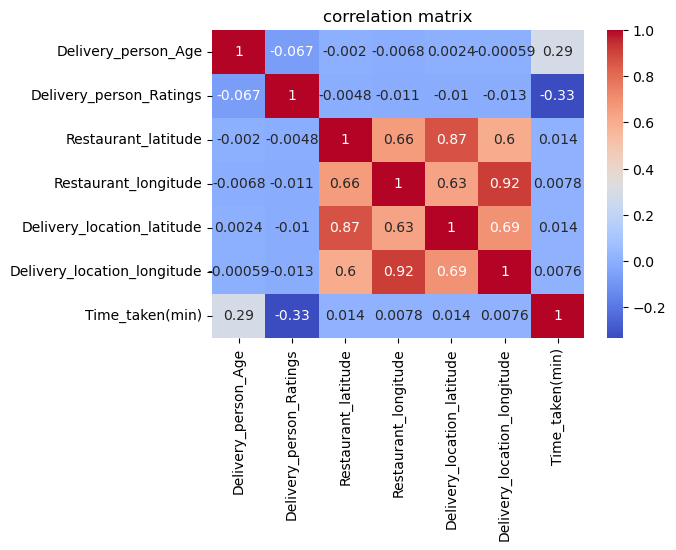

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [10]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

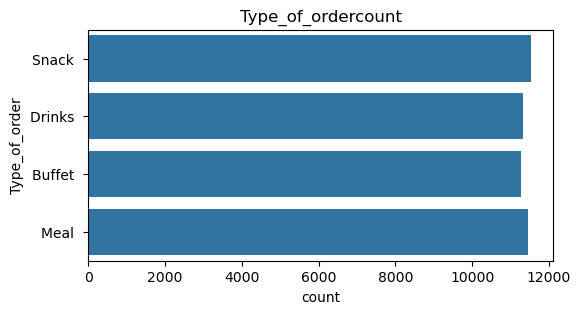

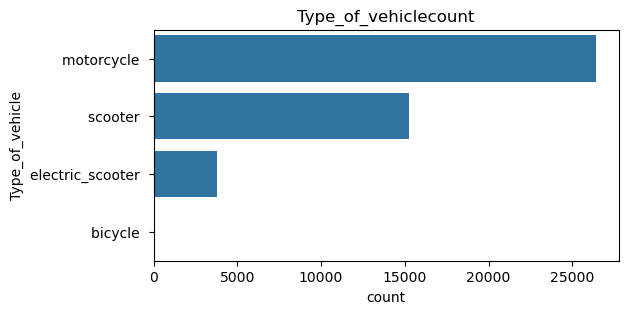

In [11]:
cat_cols=['Type_of_order', 'Type_of_vehicle']
for i in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(df[i])
    plt.title(f'{i}count')
    plt.show()

In [12]:
from geopy.distance import geodesic

def compute_distance(row):
    rest=(row['Restaurant_latitude'],row['Restaurant_longitude'])
    delv=(row['Delivery_location_latitude'],row['Delivery_location_longitude'])
    return geodesic(rest,delv).km
df['distance']=df.apply(compute_distance,axis=1)

In [13]:
df['distance'].describe()

count    45593.000000
mean        99.198950
std       1099.925157
min          1.463837
25%          4.654185
50%          9.247024
75%         13.740932
max      19709.575543
Name: distance, dtype: float64

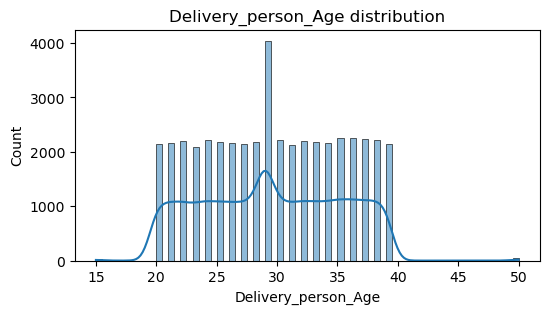

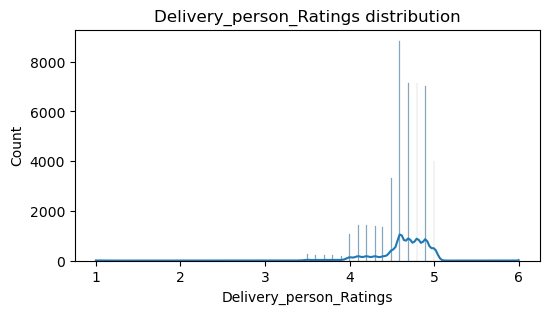

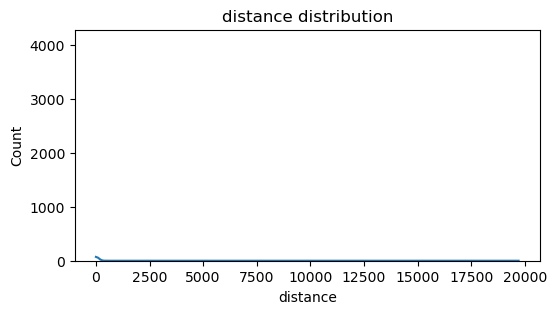

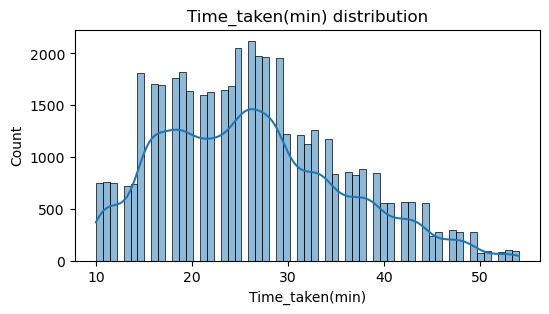

In [14]:
colms=['Delivery_person_Age','Delivery_person_Ratings','distance','Time_taken(min)']
for i in colms:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[i],kde=True)
    plt.title(f'{i} distribution')
    plt.show()

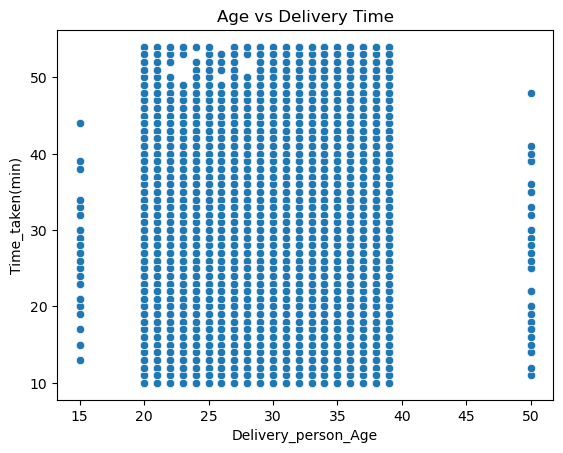

In [15]:
sns.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=df)
plt.title("Age vs Delivery Time")
plt.show()

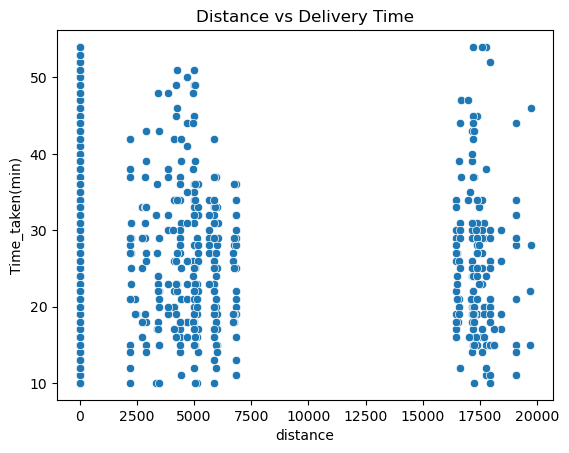

In [16]:
sns.scatterplot(x='distance', y='Time_taken(min)', data=df)
plt.title("Distance vs Delivery Time")
plt.show()

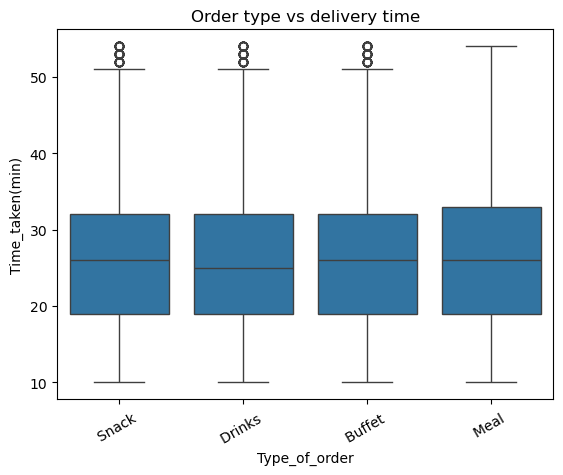

In [17]:
sns.boxplot(x='Type_of_order', y='Time_taken(min)', data=df)
plt.title("Order type vs delivery time")
plt.xticks(rotation=30)
plt.show()

In [18]:
type_long_time=df[df['Time_taken(min)']>50]['Type_of_order'].value_counts()
print(type_long_time)

Type_of_order
Buffet     99
Snack      96
Meal       92
Drinks     77
Name: count, dtype: int64


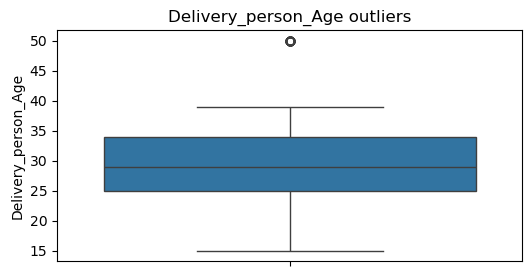

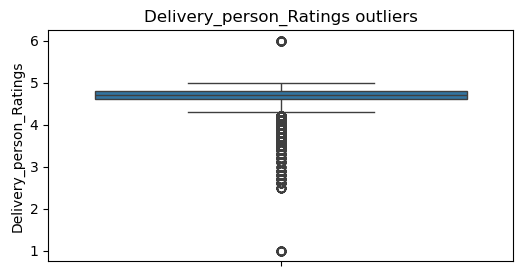

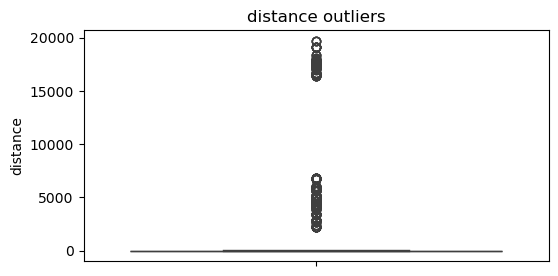

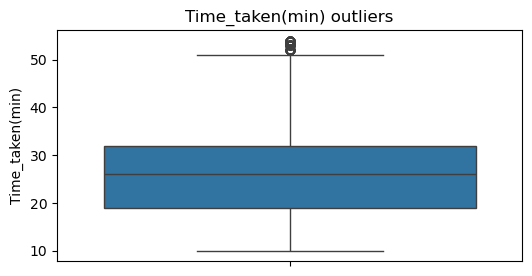

In [19]:
for i in colms:
    plt.figure(figsize=(6,3))
    sns.boxplot(df[i])
    plt.title(f'{i} outliers')
    plt.show()

In [20]:
print(df[df['distance'] > 100]['distance'].describe())

count      431.000000
mean      9475.295133
std       6270.284580
min       2203.918300
25%       4411.849693
50%       5868.132483
75%      17146.427980
max      19709.575543
Name: distance, dtype: float64


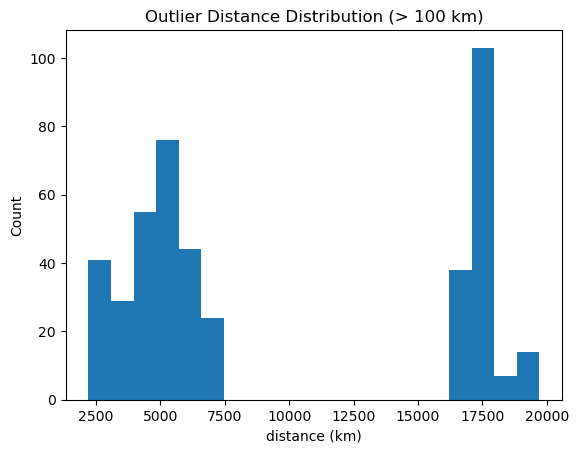

In [21]:
import matplotlib.pyplot as plt
plt.hist(df[df['distance'] > 100]['distance'], bins=20)
plt.xlabel('distance (km)')
plt.ylabel('Count')
plt.title('Outlier Distance Distribution (> 100 km)')
plt.show()

In [22]:
print(f"before: {len(df)} rows")
print(f"after: {len(df[df['distance'] <= 100])} rows")

before: 45593 rows
after: 45162 rows
